In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import pycircos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO 
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_human.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# タグをつける


# organism = "rice"
df1 = pd.read_csv("../data/chromosome/chromosome_rice_rmB1.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# タグをつける

combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)
combined_df.to_csv("../data/chromosome/HR_combined.tsv", sep='\t', index=False)
combined_df

In [4]:
# Initialize
circle = Gcircle(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

In [5]:
# Initialize
circle = Gcircle(figsize=(10,10))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # 染色体番号だけを取得
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # 22+X+Yで動的に色を変える
        else:
            color = plt.cm.Greens(chrom_number / 14)  # 12+X+Yで動的に色を変える
    except ValueError:  # "X", "Y", "Mt", "Pt"など、数値に変換できない場合
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.5, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 1000x1000 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

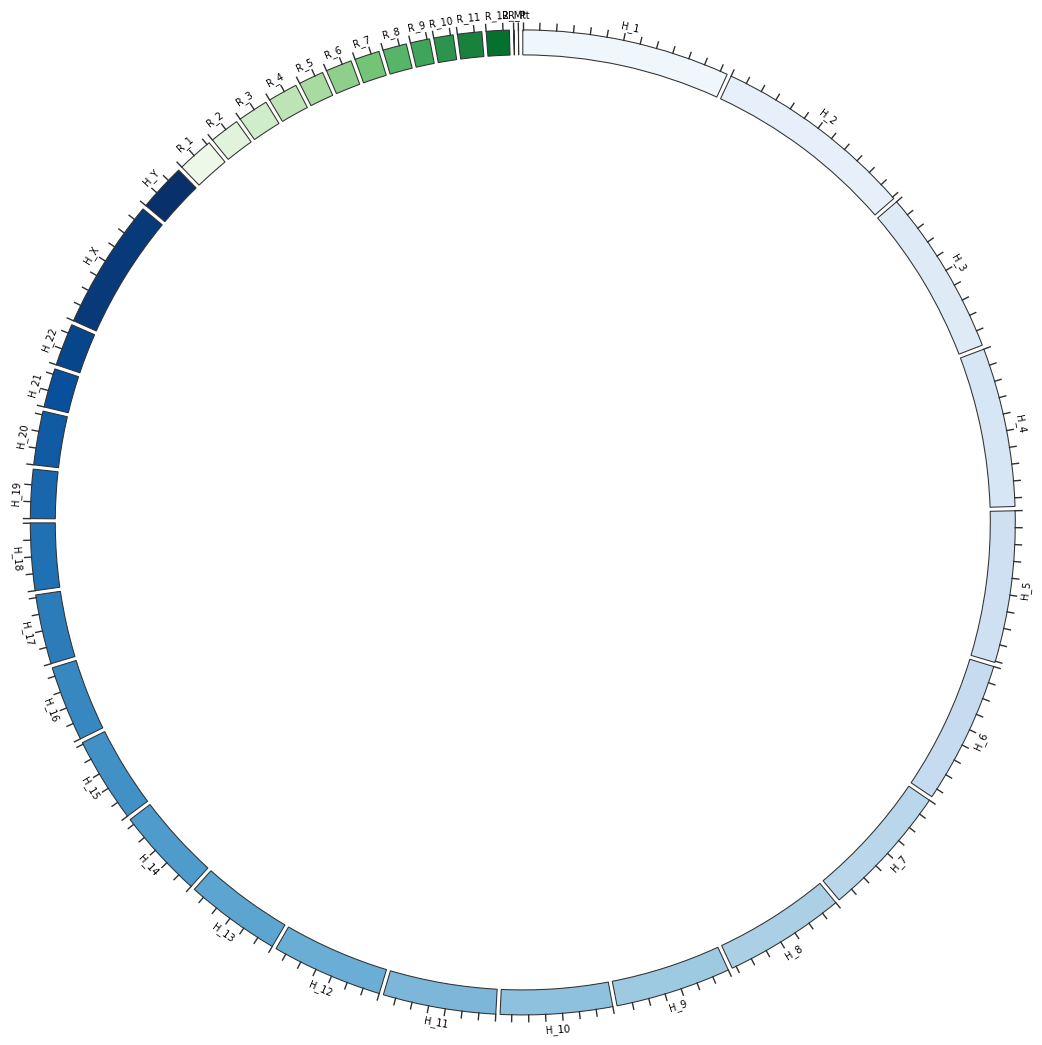

In [8]:
circle.figure

#### Scatter plot of human vs rice upregulated genes

In [ ]:
# scatter plot
df_combined = pd.read_csv("../data/rice_position_up.tsv", sep="\t")
df_combined['Chromosome/scaffold name'] = 'R_' + df_combined['Chromosome/scaffold name'].astype(str)

# Initialize
import collections
arcdata_dict = collections.defaultdict(dict)

for index, row in df_combined.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # arcdata_dictにnameがない場合, arcdata_dictに追加
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []
        arcdata_dict[name]["colors"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)
    arcdata_dict[name]["colors"].append(color)


# plot

vmin, vmax = df_combined['HN-score(HN5)'].min(), df_combined['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )


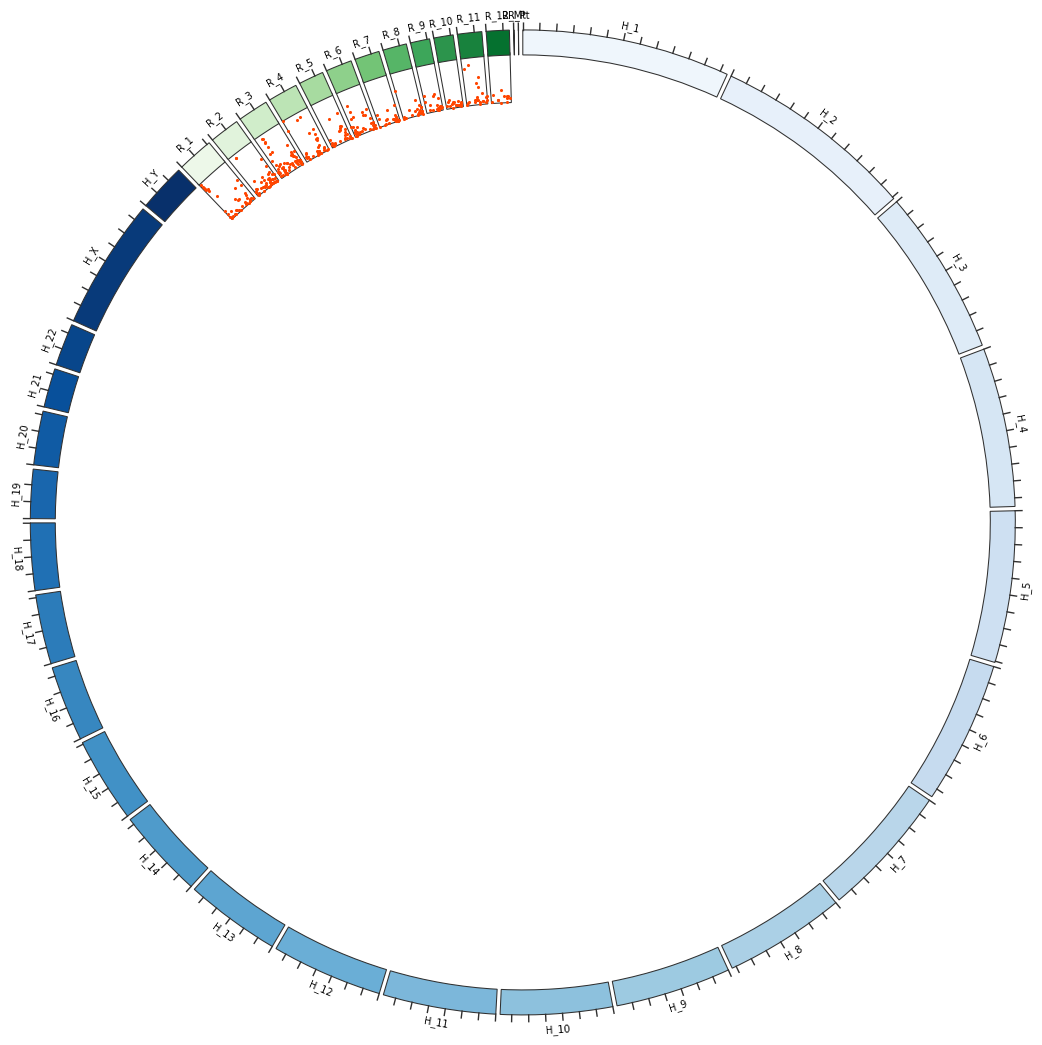

In [ ]:
circle.figure